# **Report Maker for Merchent**

# **New Start**



In [2]:
import pandas as pd
# merged_df = pd.read_csv("/content/merchant_billing_data.csv")
merged_df = pd.read_csv("../Data/MOCK_DATA.csv")

# 💰 Total Transaction Amount

Visualization saved as 'payment_analysis_last_month.png'


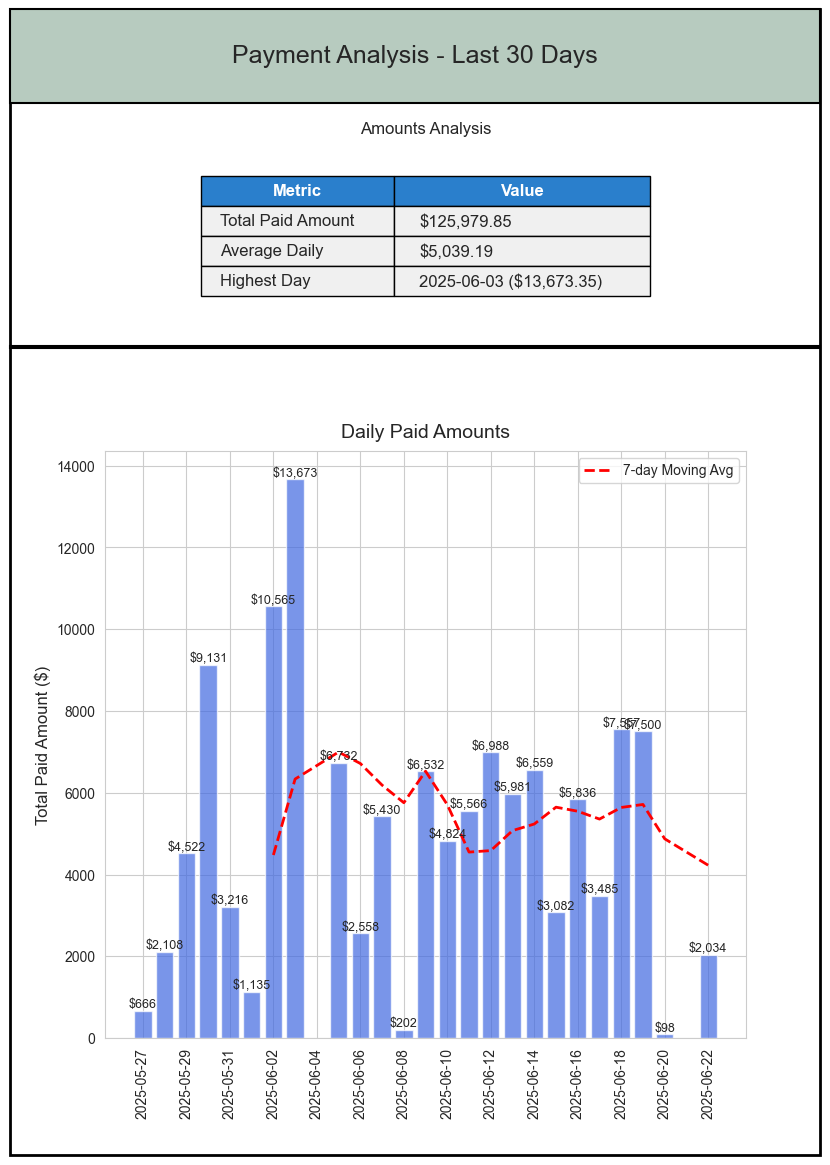

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle

# Set style
sns.set_style('whitegrid')

# Convert payment_date to datetime and filter last month
merged_df['payment_date'] = pd.to_datetime(merged_df['payment_date'])
last_month_start = datetime.now() - timedelta(days=30)
last_month = merged_df[merged_df['payment_date'] >= last_month_start]

# Calculate KPIs
total_paid_last_month = last_month['paid_amount'].sum()
avg_daily_paid = last_month.groupby(last_month['payment_date'].dt.date)['paid_amount'].sum().mean()
max_day = last_month.groupby(last_month['payment_date'].dt.date)['paid_amount'].sum().idxmax()
max_amount = last_month.groupby(last_month['payment_date'].dt.date)['paid_amount'].sum().max()

# Create daily paid amounts series
daily_paid = last_month.groupby(last_month['payment_date'].dt.date)['paid_amount'].sum()

# Create figure with subplots
fig = plt.figure(figsize=(8.27,11.69))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3], hspace=0.3)

# Create axes
ax_table = fig.add_subplot(gs[0])
ax_chart = fig.add_subplot(gs[1])

# Create a surrounding box for both elements
box = Rectangle((0.01, 0.01), 0.98, 0.98, linewidth=2, edgecolor='black', facecolor='none',
                transform=fig.transFigure, zorder=-1)
fig.patches.extend([box])

# Add horizontal separator line
separator_1 = Rectangle((0.01, 0.91), 0.98, 0.08, linewidth=1.5, edgecolor='black',
                     facecolor='#b7cbbf', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_1])

# Add horizontal separator line
separator_2 = Rectangle((0.01, 0.70), 0.98, 0.002, linewidth=1.5, edgecolor='black',
                     facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_2])


ax_table.set_title('Amounts Analysis', fontsize=12, pad=3)
# KPI table
kpi_data = [
    ["Total Paid Amount", f"${total_paid_last_month:,.2f}"],
    ["Average Daily", f"${avg_daily_paid:,.2f}"],
    ["Highest Day", f"{max_day.strftime('%Y-%m-%d')} (${max_amount:,.2f})"]
]

ax_table.axis('off')
kpi_table = ax_table.table(
    cellText=kpi_data,
    colWidths=[0.3, 0.4],
    loc='center',
    cellLoc='left',
    colLabels=["Metric", "Value"]
)

# Style the table
kpi_table.auto_set_font_size(False)
kpi_table.set_fontsize(12)
kpi_table.scale(1, 1.8)

# Highlight header
for (i, j), cell in kpi_table._cells.items():
    if i == 0:  # Header row
        cell.set_facecolor('#2a7fcc')
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor('#f0f0f0')

# Add title for the entire visualization
fig.suptitle('Payment Analysis - Last 30 Days', fontsize=18, y=0.96)

# Main histogram plot
bars = ax_chart.bar(
    daily_paid.index,
    daily_paid.values,
    color='royalblue',
    alpha=0.7,
    edgecolor='white'
)

# Format x-axis
ax_chart.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_chart.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.setp(ax_chart.get_xticklabels(), rotation=90)

# Add labels and title
ax_chart.set_title('Daily Paid Amounts', fontsize=14, pad=10)
ax_chart.set_ylabel('Total Paid Amount ($)', fontsize=12)
ax_chart.grid(True, axis='y')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax_chart.text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'${height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Add trend line (7-day moving average)
if len(daily_paid) > 7:
    moving_avg = daily_paid.rolling(window=7).mean()
    ax_chart.plot(
        daily_paid.index,
        moving_avg.values,
        color='red',
        linestyle='--',
        linewidth=2,
        label='7-day Moving Avg'
    )
    ax_chart.legend()

# Save as PNG file
plt.savefig('../artifacts/payment_analysis_last_month.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'payment_analysis_last_month.png'")

plt.show()

# 📈 Total Transaction Count

C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_17684\1022366603.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Visualization saved as 'transaction_count_analysis_last_month.png'


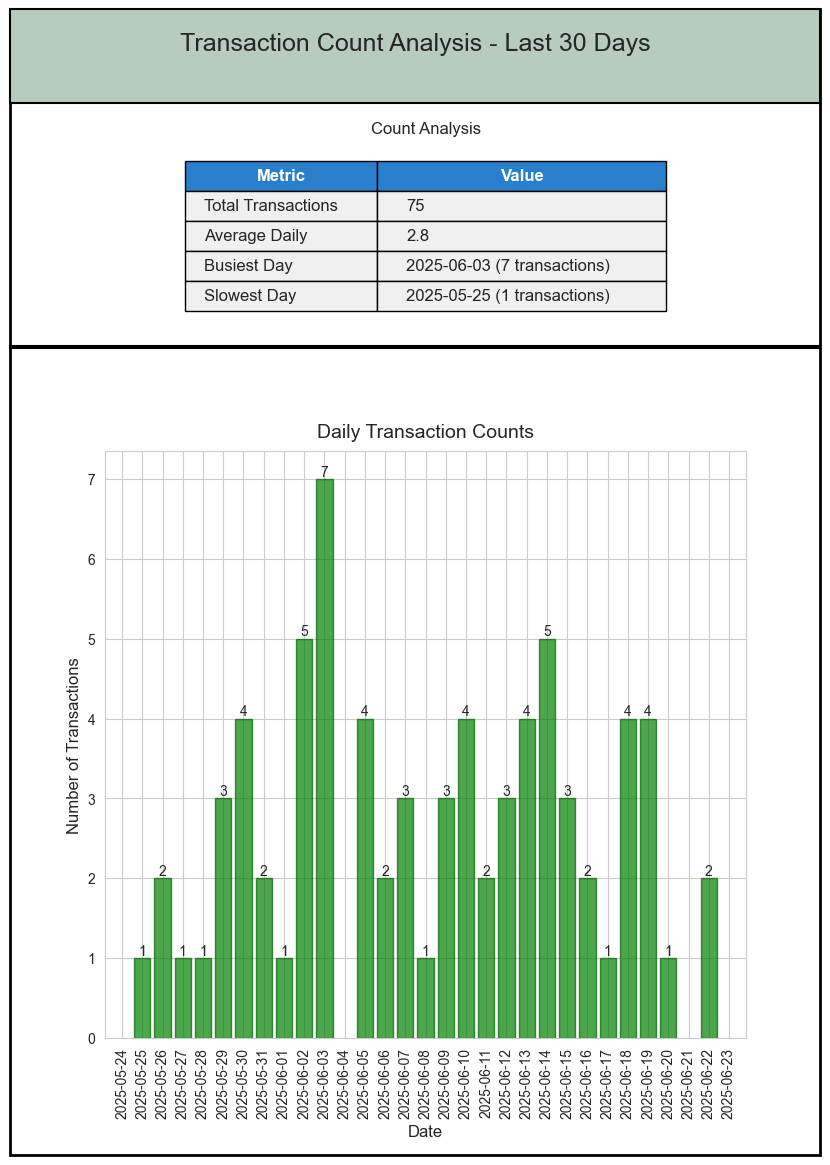

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle

# Set style
sns.set_style('whitegrid')

# Filter data for the last month
last_month = merged_df[merged_df['payment_date'] >= (pd.to_datetime('today') - pd.DateOffset(months=1))]

# Calculate transaction counts and KPIs
daily_counts_last_month = last_month.groupby(last_month['payment_date'].dt.date).size()
total_last_month = daily_counts_last_month.sum()
avg_daily_last_month = daily_counts_last_month.mean()
busiest_day = daily_counts_last_month.idxmax()
busiest_count = daily_counts_last_month.max()
slowest_day = daily_counts_last_month.idxmin()
slowest_count = daily_counts_last_month.min()

# Create figure with subplots
fig = plt.figure(figsize=(8.27,11.69))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3], hspace=0.3)  # 1:3 ratio for table:chart

# Create axes
ax_table = fig.add_subplot(gs[0])
ax_chart = fig.add_subplot(gs[1])

# Create a surrounding box for both elements
box = Rectangle((0.01, 0.01), 0.98, 0.98, linewidth=2, edgecolor='black', facecolor='none',
                transform=fig.transFigure, zorder=-1)
fig.patches.extend([box])

# Add horizontal separator line
separator_1 = Rectangle((0.01, 0.91), 0.98, 0.08, linewidth=1.5, edgecolor='black',
                     facecolor='#b7cbbf', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_1])

# Add horizontal separator line
separator_2 = Rectangle((0.01, 0.70), 0.98, 0.002, linewidth=1.5, edgecolor='black',
                     facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_2])

# Add title for the entire visualization
fig.suptitle('Transaction Count Analysis - Last 30 Days', fontsize=18, y=0.97)

# KPI table (top)
ax_table.set_title('Count Analysis', fontsize=12, pad=3)
ax_table.axis('off')
kpi_data = [
    ["Total Transactions", f"{total_last_month:,}"],
    ["Average Daily", f"{avg_daily_last_month:.1f}"],
    ["Busiest Day", f"{busiest_day} ({busiest_count} transactions)"],
    ["Slowest Day", f"{slowest_day} ({slowest_count} transactions)"]
]

kpi_table = ax_table.table(
    cellText=kpi_data,
    colWidths=[0.3, 0.45],
    loc='center',
    cellLoc='left',
    colLabels=["Metric", "Value"]
)

# Style the table
kpi_table.auto_set_font_size(False)
kpi_table.set_fontsize(12)
kpi_table.scale(1, 1.8)

# Highlight header
for (i, j), cell in kpi_table._cells.items():
    if i == 0:  # Header row
        cell.set_facecolor('#2a7fcc')
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor('#f0f0f0')

# Chart (bottom)
bars = ax_chart.bar(
    daily_counts_last_month.index,
    daily_counts_last_month.values,
    color='green',
    alpha=0.7,
    edgecolor='darkgreen'
)

# Format x-axis
ax_chart.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_chart.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.setp(ax_chart.get_xticklabels(), rotation=90)

# Add labels and title
ax_chart.set_title('Daily Transaction Counts', fontsize=14, pad=10)
ax_chart.set_xlabel('Date', fontsize=12)
ax_chart.set_ylabel('Number of Transactions', fontsize=12)
ax_chart.grid(True, axis='y')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax_chart.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Adjust layout
plt.tight_layout()

# Save as PNG file
plt.savefig('../artifacts/transaction_count_analysis_last_month.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'transaction_count_analysis_last_month.png'")

plt.show()

# Transaction status Analysis

Visualization saved as 'financial_performance_analysis.png'


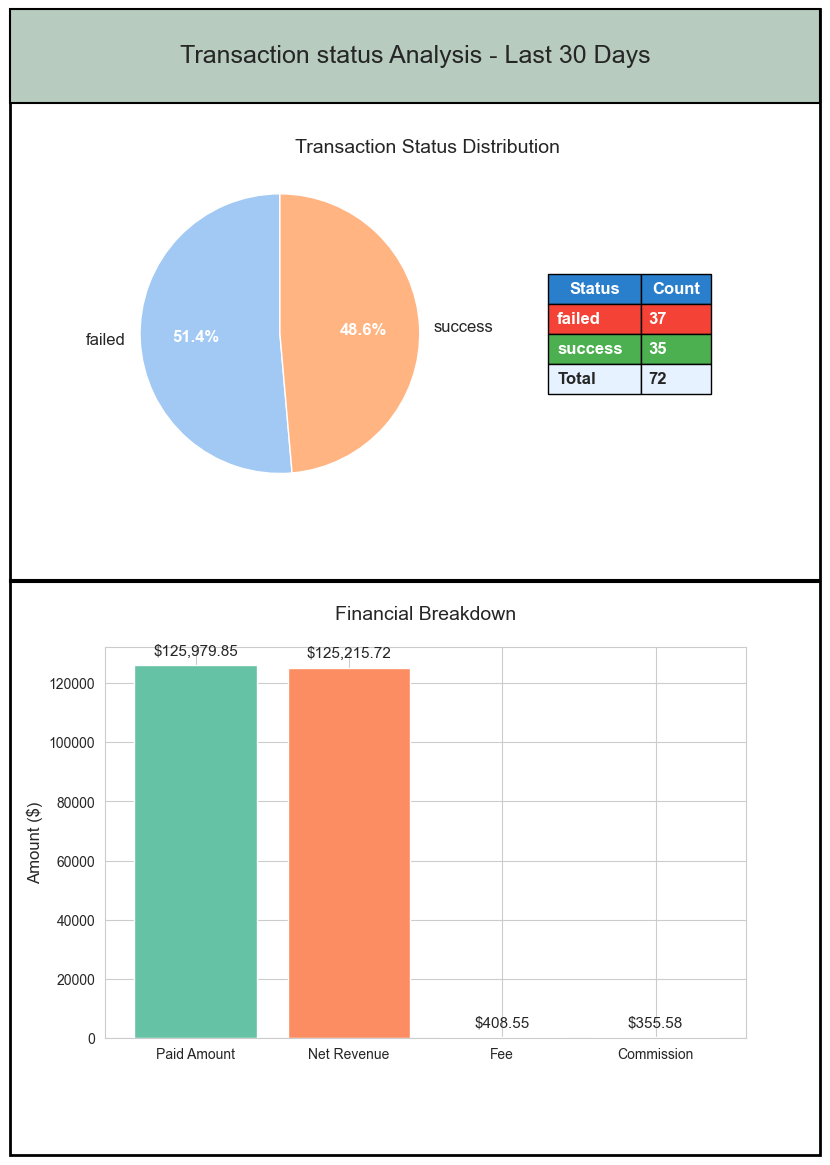

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle

# Set style
sns.set_style('whitegrid')

# Filter for the last month
last_month_date = datetime.now() - timedelta(days=30)
filtered_df = merged_df[merged_df['payment_date'] >= last_month_date].copy()

# Calculate metrics
filtered_df['net_revenue'] = filtered_df['paid_amount'] - filtered_df['fee'] - filtered_df['commission_amount']
status_counts = filtered_df['status'].value_counts()

# Create figure with surrounding box
fig = plt.figure(figsize=(8.27,11.69))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1.5, 1], hspace=0.3)

# Create surrounding box
box = Rectangle((0.01, 0.01), 0.98, 0.98, linewidth=2, edgecolor='black',
                facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([box])

# Add horizontal separator line
separator_1 = Rectangle((0.01, 0.91), 0.98, 0.08, linewidth=1.5, edgecolor='black',
                     facecolor='#b7cbbf', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_1])

# Add horizontal separator line
separator_2 = Rectangle((0.01, 0.50), 0.98, 0.002, linewidth=1.5, edgecolor='black',
                     facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_2])

# Add title for the entire visualization
fig.suptitle('Transaction status Analysis - Last 30 Days', fontsize=18, y=0.96)


# --- Pie Chart (Top Left) ---
ax_pie = fig.add_subplot(gs[0, 0])
wedges, texts, autotexts = ax_pie.pie(status_counts,
                                    labels=status_counts.index,
                                    autopct='%1.1f%%',
                                    colors=sns.color_palette('pastel'),
                                    startangle=90,
                                    textprops={'fontsize': 12})
ax_pie.set_title('Transaction Status Distribution', fontsize=14, pad=5, loc='right',x=1.3)

# Make autopct labels white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# --- Status Count Table (Top Right) ---
ax_table = fig.add_subplot(gs[0, 1])
ax_table.axis('off')

# Prepare table data
table_data = []
for status, count in status_counts.items():
    table_data.append([status, f"{count:,}"])

# Add "Total" row
table_data.append(["Total", f"{status_counts.sum():,}"])

# Create table
status_table = ax_table.table(cellText=table_data,
                            colWidths=[0.4, 0.3],
                            loc='center',
                            cellLoc='left',
                            colLabels=["Status", "Count"])

# Style table
status_table.auto_set_font_size(False)
status_table.set_fontsize(12)
status_table.scale(1, 1.8)

# Highlight header and rows
for (i, j), cell in status_table._cells.items():
    if i == 0:  # Header row
        cell.set_facecolor('#2a7fcc')  # Keep header blue
        cell.set_text_props(color='white', weight='bold')
    elif i == 1:  # First data row (e.g., Success)
        cell.set_facecolor('#F44336')  # Green
        cell.set_text_props(color='white', weight='bold')
    elif i == 2:  # Second data row (e.g., Failed)
        cell.set_facecolor('#4CAF50')  # Red
        cell.set_text_props(color='white', weight='bold')
    elif i == len(table_data):  # Total row
        cell.set_facecolor('#e6f2ff')  # Light blue
        cell.set_text_props(weight='bold')

# --- Bar Chart (Bottom) ---
ax_bar = fig.add_subplot(gs[1, :])  # Span all columns

# Prepare values
financial_values = [
    filtered_df['paid_amount'].sum(),
    filtered_df['net_revenue'].sum(),
    filtered_df['fee'].sum(),
    filtered_df['commission_amount'].sum()
]
financial_labels = ['Paid Amount', 'Net Revenue', 'Fee', 'Commission']

bars = ax_bar.bar(financial_labels, financial_values, color=sns.color_palette('Set2'))
ax_bar.set_title('Financial Breakdown', fontsize=14, pad=20)
ax_bar.set_ylabel('Amount ($)', fontsize=12)
ax_bar.grid(True, axis='y')

# Add value annotations
for bar in bars:
    height = bar.get_height()
    ax_bar.annotate(f"${height:,.2f}",
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 5),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=11)

# Save as PNG
plt.savefig('../artifacts/financial_performance_analysis.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'financial_performance_analysis.png'")

plt.show()

👤 Total Unique Users

👤 Total Unique Users for this merchent over the whole entire users

👤 New users this month

C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_17684\3677687105.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Visualization saved as 'daily_user_metrics.png'


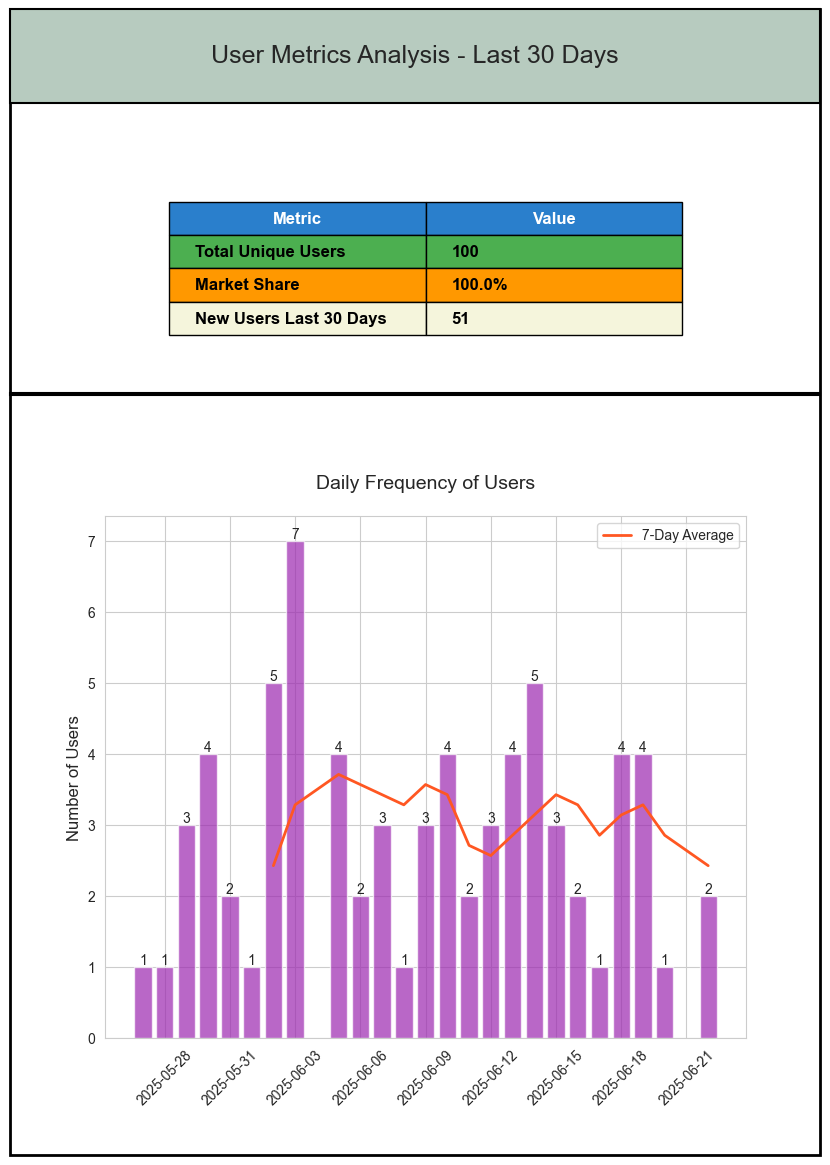

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle

# Set style
sns.set_style('whitegrid')

# Prepare data
last_month_start = datetime.now() - timedelta(days=30)
total_users = merged_df['user_id'].nunique()
new_users = merged_df[merged_df['payment_date'] >= last_month_start]['user_id'].nunique()

# For market share - replace with actual platform users
total_platform_users = 100
market_share = (total_users / total_platform_users) * 100

# Daily user counts for last month
daily_users = merged_df[merged_df['payment_date'] >= last_month_start].groupby(
    merged_df['payment_date'].dt.date
)['user_id'].nunique()

# Create figure
fig = plt.figure(figsize=(8.27,11.69))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 2], hspace=0.3)

# Create surrounding box
box = Rectangle((0.01, 0.01), 0.98, 0.98, linewidth=2, edgecolor='black',
                facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([box])

# Add horizontal separator line
separator_1 = Rectangle((0.01, 0.91), 0.98, 0.08, linewidth=1.5, edgecolor='black',
                     facecolor='#b7cbbf', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_1])

# Add horizontal separator line
separator_2 = Rectangle((0.01, 0.66), 0.98, 0.002, linewidth=1.5, edgecolor='black',
                     facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.extend([separator_2])

# Add main title
fig.suptitle('User Metrics Analysis - Last 30 Days', fontsize=18, y=0.96)

# --- KPI Table (Top) ---
ax_table = fig.add_subplot(gs[0])
ax_table.axis('off')

kpi_data = [
    ["Total Unique Users", f"{total_users:,}"],
    ["Market Share", f"{market_share:.1f}%"],
    ["New Users Last 30 Days", f"{new_users:,}"]
]

kpi_table = ax_table.table(
    cellText=kpi_data,
    colWidths=[0.4, 0.4],
    loc='center',
    cellLoc='left',
    colLabels=["Metric", "Value"]
)

# Style the table
kpi_table.auto_set_font_size(False)
kpi_table.set_fontsize(12)
kpi_table.scale(1, 2)

# Highlight cells
for (i, j), cell in kpi_table._cells.items():
    if i == 0:  # Header
        cell.set_facecolor('#2a7fcc')
        cell.set_text_props(color='white', weight='bold')
    elif i == 1:  # Total Users
        cell.set_facecolor('#4CAF50')  # Green
        cell.set_text_props(color='black', weight='bold')
    elif i == 2:  # Market Share
        cell.set_facecolor('#FF9800')  # Orange
        cell.set_text_props(color='black', weight='bold')
    elif i == 3:  # New Users
        cell.set_facecolor('#F5F5DC')  # Purple
        cell.set_text_props(color='black', weight='bold')

# --- Daily User Chart (Bottom) ---
ax_chart = fig.add_subplot(gs[1])

# Plot daily users with trend line
bars = ax_chart.bar(
    daily_users.index,
    daily_users.values,
    color='#9C27B0',  # Purple
    alpha=0.7,
    edgecolor='white',
    width=0.8
)

# Add 7-day moving average
rolling_avg = daily_users.rolling(window=7).mean()
ax_chart.plot(
    daily_users.index,
    rolling_avg,
    color='#FF5722',  # Deep orange
    linewidth=2,
    label='7-Day Average'
)

ax_chart.set_title('Daily Frequency of Users', fontsize=14, pad=20)
ax_chart.set_ylabel('Number of Users', fontsize=12)
ax_chart.grid(True, axis='y')
ax_chart.legend()

# Format x-axis
ax_chart.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_chart.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.setp(ax_chart.get_xticklabels(), rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax_chart.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )


plt.tight_layout()

# Save as PNG
plt.savefig('../artifacts/daily_user_metrics.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'daily_user_metrics.png'")

plt.show()

In [ ]:
%pip install pillow

🗺️ User State Distribution

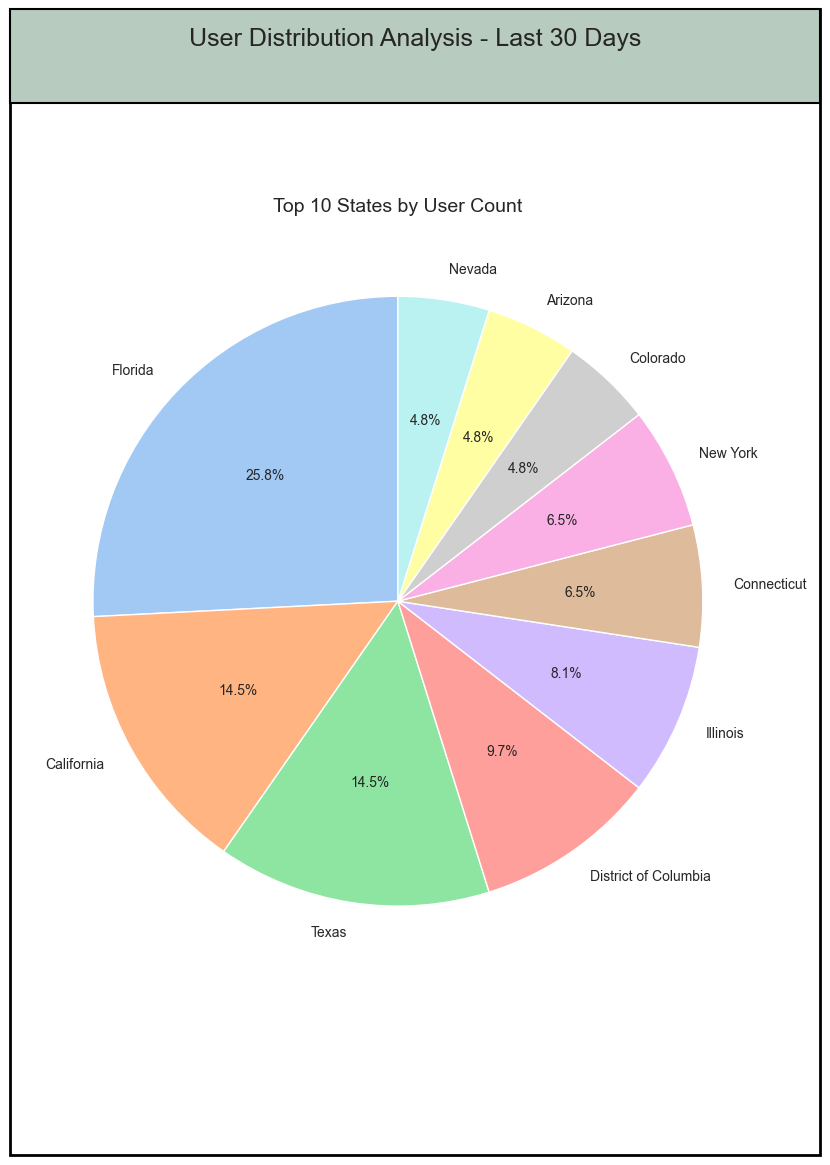

Saved chart to ../artifacts/user_state_distribution.png


In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Calculate top states
user_state_dist = merged_df.groupby('user_id')['state'].first().value_counts()
top_states = user_state_dist.head(10)

# Create single figure
fig, ax = plt.subplots(figsize=(8.27,11.69))

# Plot pie chart
ax.pie(top_states, labels=top_states.index, autopct='%1.1f%%',
       colors=sns.color_palette('pastel'), startangle=90)
ax.set_title('Top 10 States by User Count', fontsize=14)

# Add surrounding box
box = Rectangle((0.01, 0.01), 0.98, 0.98, linewidth=2, edgecolor='black',
                facecolor='none', transform=fig.transFigure, zorder=-1)
fig.patches.append(box)

# Add header bar
separator = Rectangle((0.01, 0.91), 0.98, 0.08, linewidth=1.5, edgecolor='black',
                      facecolor='#b7cbbf', transform=fig.transFigure, zorder=-1)
fig.patches.append(separator)

# Add title
fig.suptitle('User Distribution Analysis - Last 30 Days', fontsize=18, y=0.975)

# Save as PNG
output_path = "../artifacts/user_state_distribution.png"
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Saved chart to {output_path}")

# Create the pdf 

In [11]:
from PIL import Image

def save_images_to_pdf(image_paths, pdf_path):
    # Load and convert all images
    pages = [Image.open(p).convert("RGB") for p in image_paths]

    if pages:
        # Overwrite the PDF with new images
        pages[0].save(
            pdf_path,
            save_all=True,
            append_images=pages[1:]
        )
        print(f"PDF saved successfully to {pdf_path}.")
    else:
        print("No images to save.")

# List of image paths
image_paths = [
    "../artifacts/payment_analysis_last_month.png",
    "../artifacts/transaction_count_analysis_last_month.png",
    "../artifacts/financial_performance_analysis.png",
    "../artifacts/daily_user_metrics.png",
    "../artifacts/user_state_distribution.png"
]

# Output PDF path
pdf_path = "../artifacts/merchant_report.pdf"

# Run the function
save_images_to_pdf(image_paths, pdf_path)


PDF saved successfully to ../artifacts/merchant_report.pdf.
